In [4]:
cd drive/My\ Drive

/content/drive/My Drive


In [2]:
#Giải nén file darknet.zip
!unzip darknet-master.zip

Archive:  darknet-master.zip
   creating: darknet-master/.circleci/
  inflating: darknet-master/.circleci/config.yml  
  inflating: darknet-master/.gitignore  
   creating: darknet-master/3rdparty/
   creating: darknet-master/3rdparty/getopt/
  inflating: darknet-master/3rdparty/getopt/getopt.c  
  inflating: darknet-master/3rdparty/getopt/getopt.h  
   creating: darknet-master/3rdparty/pthreads/
   creating: darknet-master/3rdparty/pthreads/bin/
  inflating: darknet-master/3rdparty/pthreads/bin/pthreadGC2.dll  
  inflating: darknet-master/3rdparty/pthreads/bin/pthreadVC2.dll  
   creating: darknet-master/3rdparty/pthreads/include/
  inflating: darknet-master/3rdparty/pthreads/include/pthread.h  
  inflating: darknet-master/3rdparty/pthreads/include/sched.h  
  inflating: darknet-master/3rdparty/pthreads/include/semaphore.h  
   creating: darknet-master/3rdparty/pthreads/lib/
  inflating: darknet-master/3rdparty/pthreads/lib/libpthreadGC2.a  
  inflating: darknet-master/3rdparty/pthrea

In [5]:
cd darknet-master

/content/drive/My Drive/darknet-master


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir backup

In [10]:
import os
import numpy as np
#"obj" là tên thư mục chứa cả ảnh và file annotation.
lst_files = os.listdir("data/Augumentation/augmented_images_LisencePlate/")
lst_images = []

for file in lst_files:
  if ".txt" not in file:
    lst_images.append(file)

#Tách 35 ảnh ra làm tập validation
random_idx = np.random.randint(0, len(lst_images), 35)

#Tạo file train.txt được đặt trong thư mục darknet/data
with open("data/train.txt","w") as f:
  for idx in range(len(lst_images)):
    if idx not in random_idx:
      f.write("data/Augumentation/augmented_images_LisencePlate/"+lst_images[idx]+"\n")

#Tạo file valid.txt được đặt trong thư mục darknet/data
with open("data/valid.txt","w") as f:
    for idx in random_idx:
      f.write("data/Augumentation/augmented_images_LisencePlate/"+lst_images[idx]+"\n")

In [11]:
!make

chmod +x *.sh


In [12]:
!chmod +x ./darknet

In [13]:
!./darknet detector train data/obj.data cfg/yolo-tinyv4-obj.cfg yolov4-tiny.conv.29 -map \
-dont_show > yolotinv4_lisenceplate.log

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.841433), count: 2, class_loss = 0.072389, iou_loss = 0.815351, total_loss = 0.887740 
 total_bbox = 144106, rewritten_bbox = 0.000000 % 

 Tensor Cores are disabled until the first 3000 iterations are reached.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.880317), count: 2, class_loss = 0.000003, iou_loss = 0.364710, total_loss = 0.364714 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.907054), count: 3, class_loss = 0.000116, iou_loss = 0.957983, total_loss = 0.958098 
 total_bbox = 144111, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.821682), count: 1, class_loss = 0.000117, iou_loss = 0.136191, total_loss = 0.136308 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.865647), count

In [14]:
!ls backup/

yolo-tinyv4-obj_1000.weights  yolo-tinyv4-obj_best.weights  yolo-tinyv4-obj_last.weights


In [30]:
!./darknet detector test data/obj.data cfg/yolo-tinyv4-obj.cfg \
backup/yolo-tinyv4-obj_best.weights 20130504101802-th2.jpg

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	    

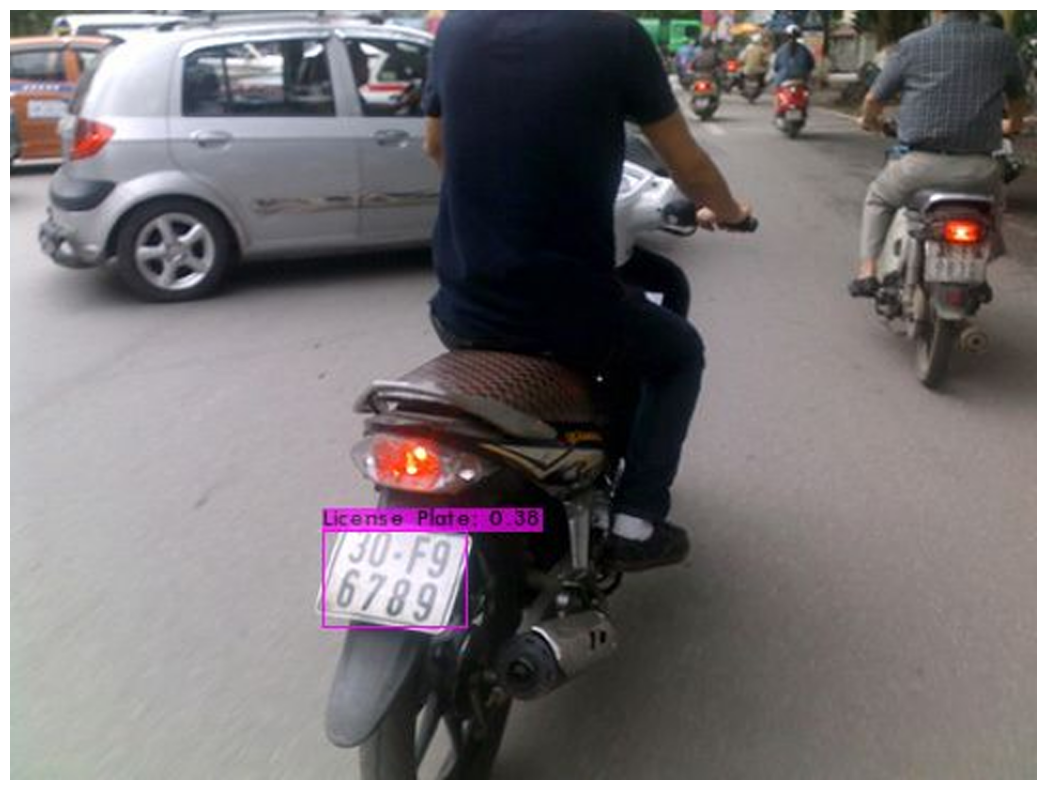

In [31]:
def show(path):
  import cv2
  import matplotlib.pyplot as plt

  image = cv2.imread(path)
  original_width, original_height = image.shape[1], image.shape[0]
  resized_image = cv2.resize(image, (2*original_width, 2*original_height)\
  , interpolation = cv2.INTER_CUBIC)

  resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(20,10))
  plt.axis("off")
  plt.imshow(resized_image)
  plt.show()

show("predictions.jpg")